# Data Science Task
## Kartik Gupta

In [3]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Importing data and Data cleaning including missing values, outliers and multi-collinearity. 

In [4]:
# Load the data
data = pd.read_csv('fraud.csv')

In [5]:
#print the data
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [4]:
# check datatypes
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
# Check for missing values
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


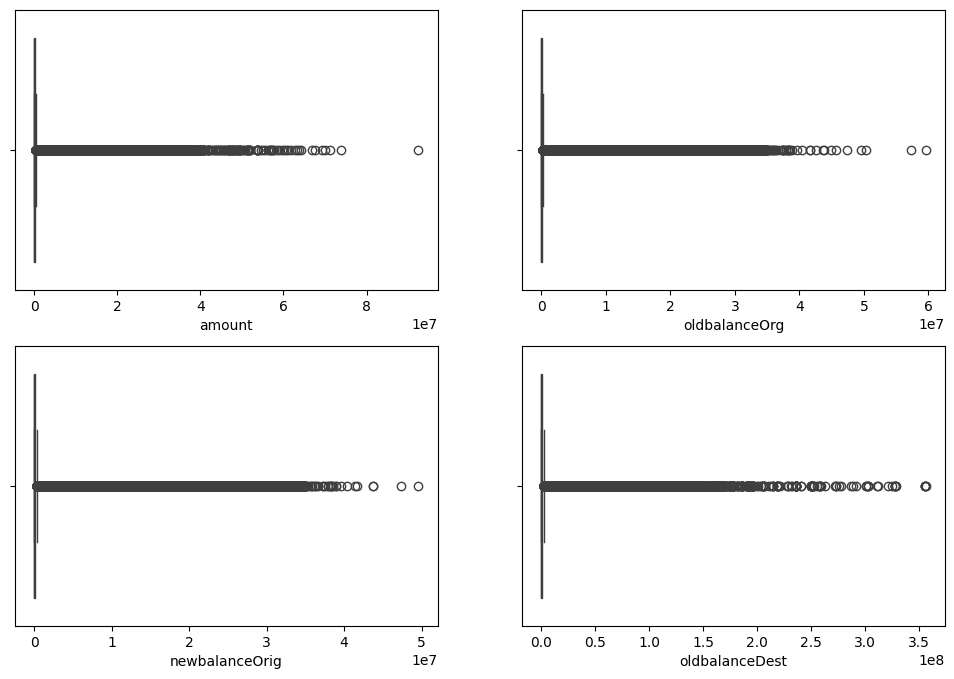

In [6]:
# Check for outliers using box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.boxplot(ax=axes[0, 0], x=data['amount'])
sns.boxplot(ax=axes[0, 1], x=data['oldbalanceOrg'])
sns.boxplot(ax=axes[1, 0], x=data['newbalanceOrig'])
sns.boxplot(ax=axes[1, 1], x=data['oldbalanceDest'])
plt.show()

In [7]:
# Handling outliers (considering z-score)
from scipy.stats import zscore

In [8]:
z_scores = zscore(data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

In [9]:
# Drop irrelevant columns for correlation matrix (e.g., 'nameOrig', 'nameDest')
data_for_corr = data.drop(['nameOrig', 'nameDest'], axis=1)

In [10]:
# One-hot encode categorical variable 'type'
data_for_corr = pd.get_dummies(data_for_corr, columns=['type'], drop_first=True)

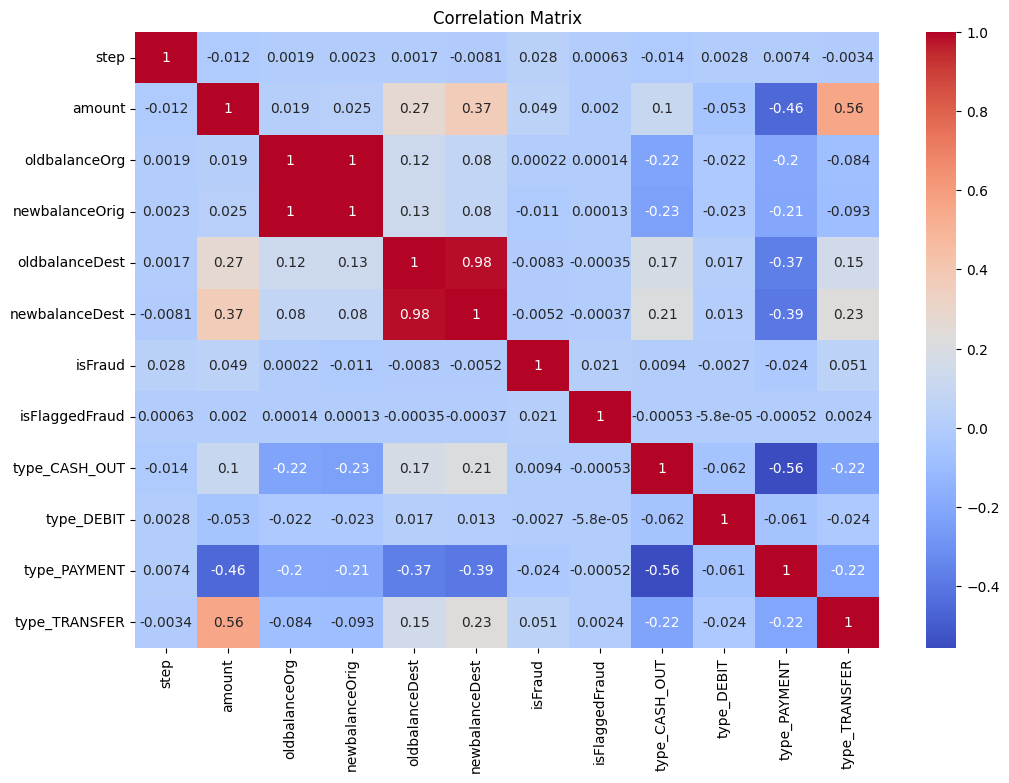

In [11]:
# Calculate the correlation matrix
correlation_matrix = data_for_corr.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [8]:
# Checking for amount of fraud transactions:-
not_fraud = len(data[data.isFraud == 0])
fraud = len(data[data.isFraud == 1])
not_fraud_percent = (not_fraud / (fraud + not_fraud)) * 100
fraud_percent = (fraud / (fraud + not_fraud)) * 100

print("Number of Legit transactions: ", not_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(not_fraud_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


## Building the fraud detection model

In [12]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['type'], drop_first=True)

In [13]:
# Split the data into features and target
X = data.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y = data['isFraud']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Build a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9996954840531319
Confusion Matrix:
 [[1217020      25]
 [    346     936]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1217045
           1       0.97      0.73      0.83      1282

    accuracy                           1.00   1218327
   macro avg       0.99      0.87      0.92   1218327
weighted avg       1.00      1.00      1.00   1218327



## Describe your fraud detection model in elaboration
* The Random Forest Classifier is an ensemble learning algorithm that combines multiple decision trees to make more accurate predictions.
* Random Forest is versatile and can be applied to both classification and regression tasks. In this case, it is used for binary classification (fraudulent or not fraudulent).
* The Random Forest builds multiple decision trees during the training phase.
* During prediction, each decision tree in the forest casts a vote for the predicted class. The final prediction is determined by the majority vote among all the decision trees.
* Random Forest provides a measure of feature importance based on how much each feature contributes to reducing the impurity in the dataset.
.

## How did you select variables to be included in the model?
* I used one-hot encoding to convert the categorical variable 'type' into numerical format. This allows the model to work with these categorical features.
* I included all other relevant numerical features, excluding 'nameOrig' and 'nameDest' which are identifiers and might not contribute to the model's predictive power.

## Demonstrate the performance of the model by using the best set of tools.
In the code for "Building the fraud detection model", we have:-
* Train-Test Split: The data is split into training and testing sets to evaluate the model's performance on unseen data.
* Standardization: StandardScaler is used to scale the numerical features, ensuring they have a mean of 0 and a standard deviation of 1. This is important for models like Random Forest that are sensitive to the scale of input features.
* Random Forest Classifier: I chose the Random Forest algorithm for fraud detection. It is an ensemble learning method that combines multiple decision trees to improve predictive performance and control overfitting.
* Model Evaluation: I used accuracy, confusion matrix, and classification report to evaluate the model.

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9996954840531319
Confusion Matrix:
 [[1217020      25]
 [    346     936]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1217045
           1       0.97      0.73      0.83      1282

    accuracy                           1.00   1218327
   macro avg       0.99      0.87      0.92   1218327
weighted avg       1.00      1.00      1.00   1218327



## What are the key factors that predict fraudulent customers?


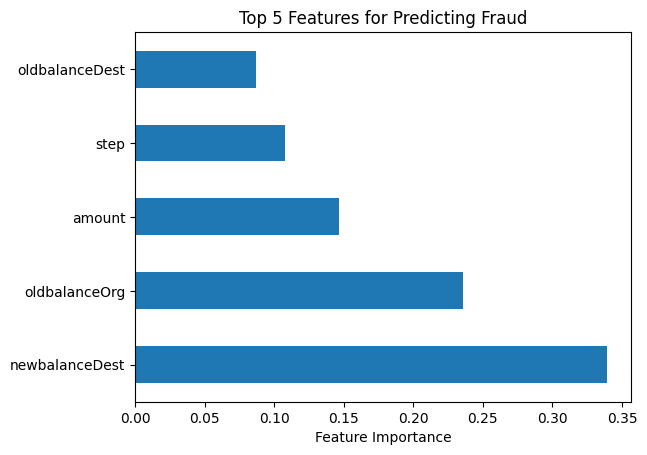

In [19]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.title('Top 5 Features for Predicting Fraud')
plt.xlabel('Feature Importance')
plt.show()

* These are the top features that are most important in predicting fraudulent transactions.
* The importance of features is as follows:-
   - oldbalanceDest < step < amount < oldbalanceOrg < newbalanceDest

## Do these factors make sense? If yes, How? If not, How not?
* As per the data dictionary, the factors presented in the image make sense in fraud detection as they capture essential elements of financial transactions that are commonly exploited in fraudulent activities.
* The feature importance presented in the image indicates the significance of these factors in predicting fraud. The highlighted features align with the typical patterns associated with possible fraudulent activities, such as anomalies in transaction amounts, timing, and balance changes.

## What kind of prevention should be adopted while the company updates its infrastructure?
* Implement continuous monitoring of transactions and user behaviors to identify anomalies in real-time.
* Strengthen authentication processes, including multi-factor authentication, to enhance the security of customer accounts.
* Keep the fraud detection models up-to-date by retraining them with new data to adapt to evolving fraud patterns.

## Assuming these actions have been implemented, how would you determine if they work?
* Regularly monitor key metrics such as accuracy, precision, recall, and F1-score of the fraud detection model. A decrease in fraud-related issues and improvements in these metrics may indicate the effectiveness of the preventive measures.
* Keep track of incident reports related to fraud. A reduction in reported incidents or successful prevention of fraudulent activities would suggest the effectiveness of the preventive measures.
* Analyze the distribution of transactions over time. If the preventive measures are effective, there should be a decrease in the frequency of fraudulent transactions.